<a href="https://colab.research.google.com/github/sadoky/Pandas/blob/master/regresion_mejorada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install skforecast

!pip install matplotlib==3.1.3
verbose=False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skforecast 0.5.0 requires matplotlib<=3.5,>=3.3, but you have matplotlib 3.1.3 which is incompatible.


In [16]:
# tratamiento de datos 
import numpy as np
import pandas as pd

#graficos
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth']=1.5
%matplotlib inline

# modelado y forecasting
from lightgbm import LGBMRegressor # poderosa herramienta en regresiones tanto en numero de varoiables como en observaciones 
from skforecast.ForecasterAutoreg import ForecasterAutoreg # escoge el modelo autorregresivo
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster


#configuracion warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)
print(df.head(6))

              PeriodEnd           PeriodStart Period  AirTemp  CloudOpacity  \
0  2021-04-29T00:10:00Z  2021-04-29T00:05:00Z   PT5M     11.0          42.4   
1  2021-04-29T00:15:00Z  2021-04-29T00:10:00Z   PT5M     11.0          43.1   
2  2021-04-29T00:20:00Z  2021-04-29T00:15:00Z   PT5M     11.0          43.5   
3  2021-04-29T00:25:00Z  2021-04-29T00:20:00Z   PT5M     11.0          43.7   
4  2021-04-29T00:30:00Z  2021-04-29T00:25:00Z   PT5M     11.0          43.9   
5  2021-04-29T00:35:00Z  2021-04-29T00:30:00Z   PT5M     11.0          44.0   

   Dhi  Dni  Ghi  PrecipitableWater  RelativeHumidity  WindDirection10m  \
0    0    0    0               24.1              98.5               302   
1    0    0    0               24.1              98.5               302   
2    0    0    0               24.1              98.5               301   
3    0    0    0               24.1              98.5               300   
4    0    0    0               24.1              98.5               299

In [4]:
datos=df["Ghi"].iloc[0:8700]

In [5]:
datos_train=df["Ghi"].iloc[0:8700]
datos_val=df["Ghi"].iloc[8700:10000]
datos_test=df["Ghi"].iloc[10000:11500]

xaxis=np.arange(start=0,stop=43500,step=5)

<function matplotlib.pyplot.show(*args, **kw)>

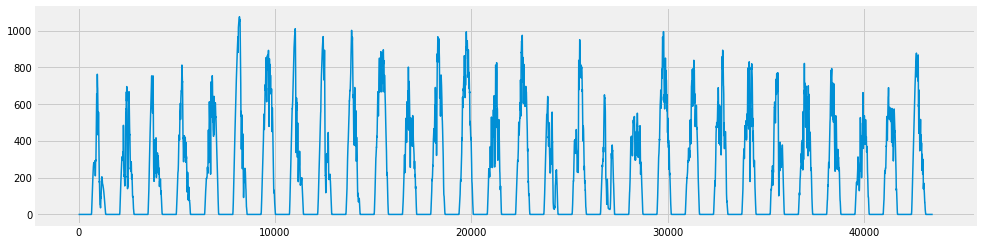

In [17]:
#grafica de la serie temporal 
fig, ax=plt.subplots(figsize=(15,4))
ax.plot(xaxis,datos_train)
plt.show

In [7]:
# crear y entrenar forecaster

# profundidad maxima=60 tasa de aprendizaje=0.39 numero de estimaciones = 50
# lags numero de ventanas anteriores que se usan para la prediccion=4200


forecaster=ForecasterAutoreg(
    regressor=LGBMRegressor(max_depth=60,learning_rate=0.39,n_estimators=50),lags=4200
)


In [8]:
forecaster.fit(y=datos_train)

In [9]:
predicciones=forecaster.predict(1500)
predicciones

8700    -0.00006
8701    -0.00006
8702    -0.00006
8703    -0.00006
8704    -0.00006
          ...   
10195   -0.00006
10196   -0.00006
10197   -0.00006
10198   -0.00006
10199   -0.00006
Name: pred, Length: 1500, dtype: float64

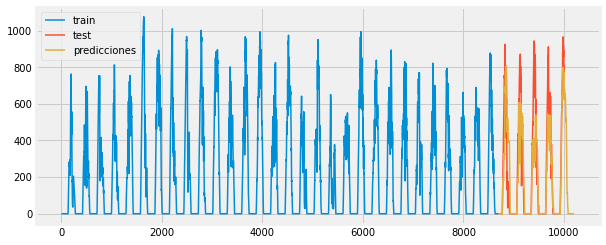

In [18]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();